## Business Case
To predict cred score for current credit card customers.

## Domain Analysis
There are three datasets namely, Cust_Account, Cust_Enquiry and Cust_Demographics. 
- Customer Account Data (Table : Cust_Account):
This table contains customer’s historical accounts data and payments history
- Customer Enquiry Data (Table : Cust_Enquiry):
This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
- Demographics Data (Table : Cust_Demographics):
Current customer applications with demographic data

 **Target variable → Bad_label**
- 0 – Customer has Good credit history
- 1 – Customer has Bad credit history

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing Data 

In [2]:
import mysql.connector

In [3]:
conn= mysql.connector.connect(host='18.136.157.135',port='3306',user='dm_team1', password='DM!$Team&279@20!',database='project_banking')

In [4]:
conn

### Importing first table named 'Cust_Account'

In [5]:
cust_acc=pd.read_sql_query("SELECT * from Cust_Account",conn)
cust_acc

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,...,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,...,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,...,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,...,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,...,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,...,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,...,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,...,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


### Importing second table named 'Cust_Enquiry'

In [6]:
cust_enq=pd.read_sql_query("SELECT * from Cust_Enquiry",conn)
cust_enq

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


### Importing third table named 'Cust_Demographics'

In [7]:
cust_demog=pd.read_sql_query("SELECT * from Cust_Demographics",conn)
cust_demog

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,...,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,...,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,...,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,...,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,...,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,...,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,...,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card Setup,14,68000,...,13,R,,,0000-00-00,0,99111XXXXX,1,N,0
23894,03-Nov-15,23895,30-Sep-15,Platinum Deligh,30-Sep-15,740,3,Card Setup,14,158000,...,10,R,,,0000-00-00,0,93100XXXXX,1,N,0


In [8]:
cust_demog.columns

Index(['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52',
       'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       '

In [9]:
cust_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

In [10]:
cust_enq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dt_opened    413188 non-null  object
 1   customer_no  413188 non-null  object
 2   upload_dt    413188 non-null  object
 3   enquiry_dt   413188 non-null  object
 4   enq_purpose  413188 non-null  object
 5   enq_amt      413188 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB


In [11]:
cust_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dt_opened            186329 non-null  object
 1   customer_no          186329 non-null  object
 2   upload_dt            186329 non-null  object
 3   acct_type            186329 non-null  object
 4   owner_indic          186329 non-null  object
 5   opened_dt            186329 non-null  object
 6   last_paymt_dt        186329 non-null  object
 7   closed_dt            186329 non-null  object
 8   reporting_dt         186329 non-null  object
 9   high_credit_amt      186329 non-null  object
 10  cur_balance_amt      186329 non-null  object
 11  amt_past_due         186329 non-null  object
 12  paymenthistory1      186329 non-null  object
 13  paymenthistory2      186329 non-null  object
 14  paymt_str_dt         186329 non-null  object
 15  paymt_end_dt         186329 non-nu

## Converting SQL file into csv format

In [12]:
cust_acc.to_csv('cust_account',index=False)

In [13]:
acc_data=pd.read_csv('cust_account')
acc_data.head()

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,...,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,...,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,...,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,...,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,...,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,NaN,31-May-15,20250.0,...,NaN,"""""""000000000000000""""""",NaN,01-May-15,01-Jan-15,NaN,NaN,NaN,NaN,NaN


In [14]:
cust_enq.to_csv('cust_enquiry',index=False)

In [15]:
enq_data=pd.read_csv('cust_enquiry')
enq_data.head()

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2.0,3500000.0
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5.0,500000.0
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0.0,50000.0
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10.0,50000.0
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10.0,1000.0


In [16]:
cust_demog.to_csv('cust_demography',index=False)

In [17]:
demog_data=pd.read_csv('cust_demography')
demog_data.head()

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,...,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,...,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,...,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0


In [18]:
enq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt_opened    413188 non-null  object 
 1   customer_no  413188 non-null  int64  
 2   upload_dt    413078 non-null  object 
 3   enquiry_dt   413078 non-null  object 
 4   enq_purpose  413078 non-null  float64
 5   enq_amt      413078 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [19]:
acc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_opened            186329 non-null  object 
 1   customer_no          186329 non-null  int64  
 2   upload_dt            186329 non-null  object 
 3   acct_type            186329 non-null  int64  
 4   owner_indic          186329 non-null  int64  
 5   opened_dt            185874 non-null  object 
 6   last_paymt_dt        160842 non-null  object 
 7   closed_dt            77254 non-null   object 
 8   reporting_dt         186329 non-null  object 
 9   high_credit_amt      177454 non-null  float64
 10  cur_balance_amt      186329 non-null  int64  
 11  amt_past_due         876 non-null     float64
 12  paymenthistory1      186329 non-null  object 
 13  paymenthistory2      78505 non-null   object 
 14  paymt_str_dt         186328 non-null  object 
 15  paymt_end_dt     

In [20]:
demog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt_opened    23896 non-null  object 
 1   customer_no  23896 non-null  int64  
 2   entry_time   23881 non-null  object 
 3   feature_1    23881 non-null  object 
 4   feature_2    21060 non-null  object 
 5   feature_3    21060 non-null  float64
 6   feature_4    23881 non-null  float64
 7   feature_5    23881 non-null  object 
 8   feature_6    23881 non-null  float64
 9   feature_7    23881 non-null  float64
 10  feature_8    1261 non-null   object 
 11  feature_9    1261 non-null   object 
 12  feature_10   51 non-null     object 
 13  feature_11   23881 non-null  object 
 14  feature_12   23881 non-null  object 
 15  feature_13   10892 non-null  object 
 16  feature_14   16163 non-null  float64
 17  feature_15   23873 non-null  object 
 18  feature_16   23869 non-null  object 
 19  feat

## Data Preprocessing

### Data Preprocessing of Enquiry dataset

In [21]:
# Finding total sum of enquiry amount of each individual
total_enq_amt=pd.DataFrame(enq_data.groupby('customer_no').enq_amt.sum().reset_index())
total_enq_amt.columns=['customer_no','total_amt']
total_enq_amt

,customer_no,total_amt
0,1,4.981150e+06
1,2,6.676682e+09
2,3,3.400000e+06
3,4,5.081000e+07
4,5,2.000000e+03
...,...,...
23891,23892,1.570344e+06
23892,23893,2.390100e+05
23893,23894,1.020000e+05
23894,23895,7.270000e+05


In [22]:
# Finding how many times each individual has enquired
enq_count=pd.DataFrame(enq_data.groupby('customer_no').customer_no.count())
enq_count.columns=['count']
enq_count

,count
customer_no,
1,18
2,68
3,1
4,34
5,2
...,...
23892,16
23893,12
23894,4


In [23]:
# Merging
new_enq_data=total_enq_amt.merge(enq_count,on='customer_no')
new_enq_data

,customer_no,total_amt,count
0,1,4.981150e+06,18
1,2,6.676682e+09,68
2,3,3.400000e+06,1
3,4,5.081000e+07,34
4,5,2.000000e+03,2
...,...,...,...
23891,23892,1.570344e+06,16
23892,23893,2.390100e+05,12
23893,23894,1.020000e+05,4
23894,23895,7.270000e+05,8


In [24]:
new_enq_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23896 entries, 0 to 23895
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_no  23896 non-null  int64  
 1   total_amt    23896 non-null  float64
 2   count        23896 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 746.8 KB


In [25]:
## Step 5:-Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
enq_data_sc=sc.fit_transform(new_enq_data.drop(['customer_no'],axis=1))  
enq_data_sc

array([[6.99628008e-04, 5.53745928e-02],
       [9.37774156e-01, 2.18241042e-01],
       [4.77547399e-04, 0.00000000e+00],
       ...,
       [1.43264220e-05, 9.77198697e-03],
       [1.02110870e-04, 2.28013029e-02],
       [1.60146939e-03, 4.88599349e-02]])

In [26]:
pd.DataFrame(enq_data_sc)

,0,1
0,6.996280e-04,0.055375
1,9.377742e-01,0.218241
2,4.775474e-04,0.000000
3,7.136525e-03,0.107492
4,2.809102e-07,0.003257
...,...,...
23891,2.205629e-04,0.048860
23892,3.357018e-05,0.035831
23893,1.432642e-05,0.009772
23894,1.021109e-04,0.022801


In [27]:
new_enq_data.columns

Index(['customer_no', 'total_amt', 'count'], dtype='object')

In [28]:
scaled_enq_data=pd.DataFrame(enq_data_sc,columns=['total_amt', 'count'])
scaled_enq_data

,total_amt,count
0,6.996280e-04,0.055375
1,9.377742e-01,0.218241
2,4.775474e-04,0.000000
3,7.136525e-03,0.107492
4,2.809102e-07,0.003257
...,...,...
23891,2.205629e-04,0.048860
23892,3.357018e-05,0.035831
23893,1.432642e-05,0.009772
23894,1.021109e-04,0.022801


In [29]:
unscaled=pd.DataFrame(new_enq_data['customer_no'])
unscaled

,customer_no
0,1
1,2
2,3
3,4
4,5
...,...
23891,23892
23892,23893
23893,23894
23894,23895


In [30]:
final_enq_data=pd.concat([unscaled,scaled_enq_data],axis=1)
final_enq_data

,customer_no,total_amt,count
0,1,6.996280e-04,0.055375
1,2,9.377742e-01,0.218241
2,3,4.775474e-04,0.000000
3,4,7.136525e-03,0.107492
4,5,2.809102e-07,0.003257
...,...,...,...
23891,23892,2.205629e-04,0.048860
23892,23893,3.357018e-05,0.035831
23893,23894,1.432642e-05,0.009772
23894,23895,1.021109e-04,0.022801


### Data Preprocessing of Account Dataset

### Dropping some of the columns


In [31]:
new_cust_acc=acc_data[['customer_no','high_credit_amt','cur_balance_amt','amt_past_due','creditlimit','cashlimit','rateofinterest','actualpaymentamount']]
new_cust_acc

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount
0,12265,20900.0,0,NaN,NaN,NaN,NaN,NaN
1,12265,16201.0,10390,NaN,14000.0,1400.0,NaN,5603.0
2,12265,41028.0,34420,NaN,NaN,NaN,NaN,NaN
3,15606,93473.0,0,NaN,NaN,NaN,NaN,NaN
4,15606,20250.0,13500,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
186324,1611,24228.0,24228,NaN,NaN,NaN,NaN,NaN
186325,1611,19584.0,0,NaN,NaN,NaN,NaN,NaN
186326,1611,50844.0,0,NaN,NaN,NaN,NaN,NaN
186327,1611,35587.0,0,NaN,15000.0,6000.0,NaN,NaN


In [32]:
new_cust_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_no          186329 non-null  int64  
 1   high_credit_amt      177454 non-null  float64
 2   cur_balance_amt      186329 non-null  int64  
 3   amt_past_due         876 non-null     float64
 4   creditlimit          48852 non-null   float64
 5   cashlimit            35282 non-null   float64
 6   rateofinterest       24833 non-null   object 
 7   actualpaymentamount  41053 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 11.4+ MB


In [33]:
# Replacing '"9','"8', and '"7' present in rateofinterest column by '9', '8' and '7' respectively.
new_cust_acc['rateofinterest'].mask(new_cust_acc['rateofinterest']=='"9','9',inplace=True)

In [34]:
new_cust_acc['rateofinterest'].mask(new_cust_acc['rateofinterest']=='"8','8',inplace=True)

In [35]:
new_cust_acc['rateofinterest'].mask(new_cust_acc['rateofinterest']=='"7','7',inplace=True)

### Converting object data type into float type

In [36]:
new_cust_acc['rateofinterest']=new_cust_acc['rateofinterest'].astype(float)

In [37]:
new_cust_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_no          186329 non-null  int64  
 1   high_credit_amt      177454 non-null  float64
 2   cur_balance_amt      186329 non-null  int64  
 3   amt_past_due         876 non-null     float64
 4   creditlimit          48852 non-null   float64
 5   cashlimit            35282 non-null   float64
 6   rateofinterest       24833 non-null   float64
 7   actualpaymentamount  41053 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 11.4 MB


### Imputing Missing Values


In [38]:
acc_columns=new_cust_acc[['high_credit_amt','amt_past_due','creditlimit','cashlimit','rateofinterest','actualpaymentamount']]

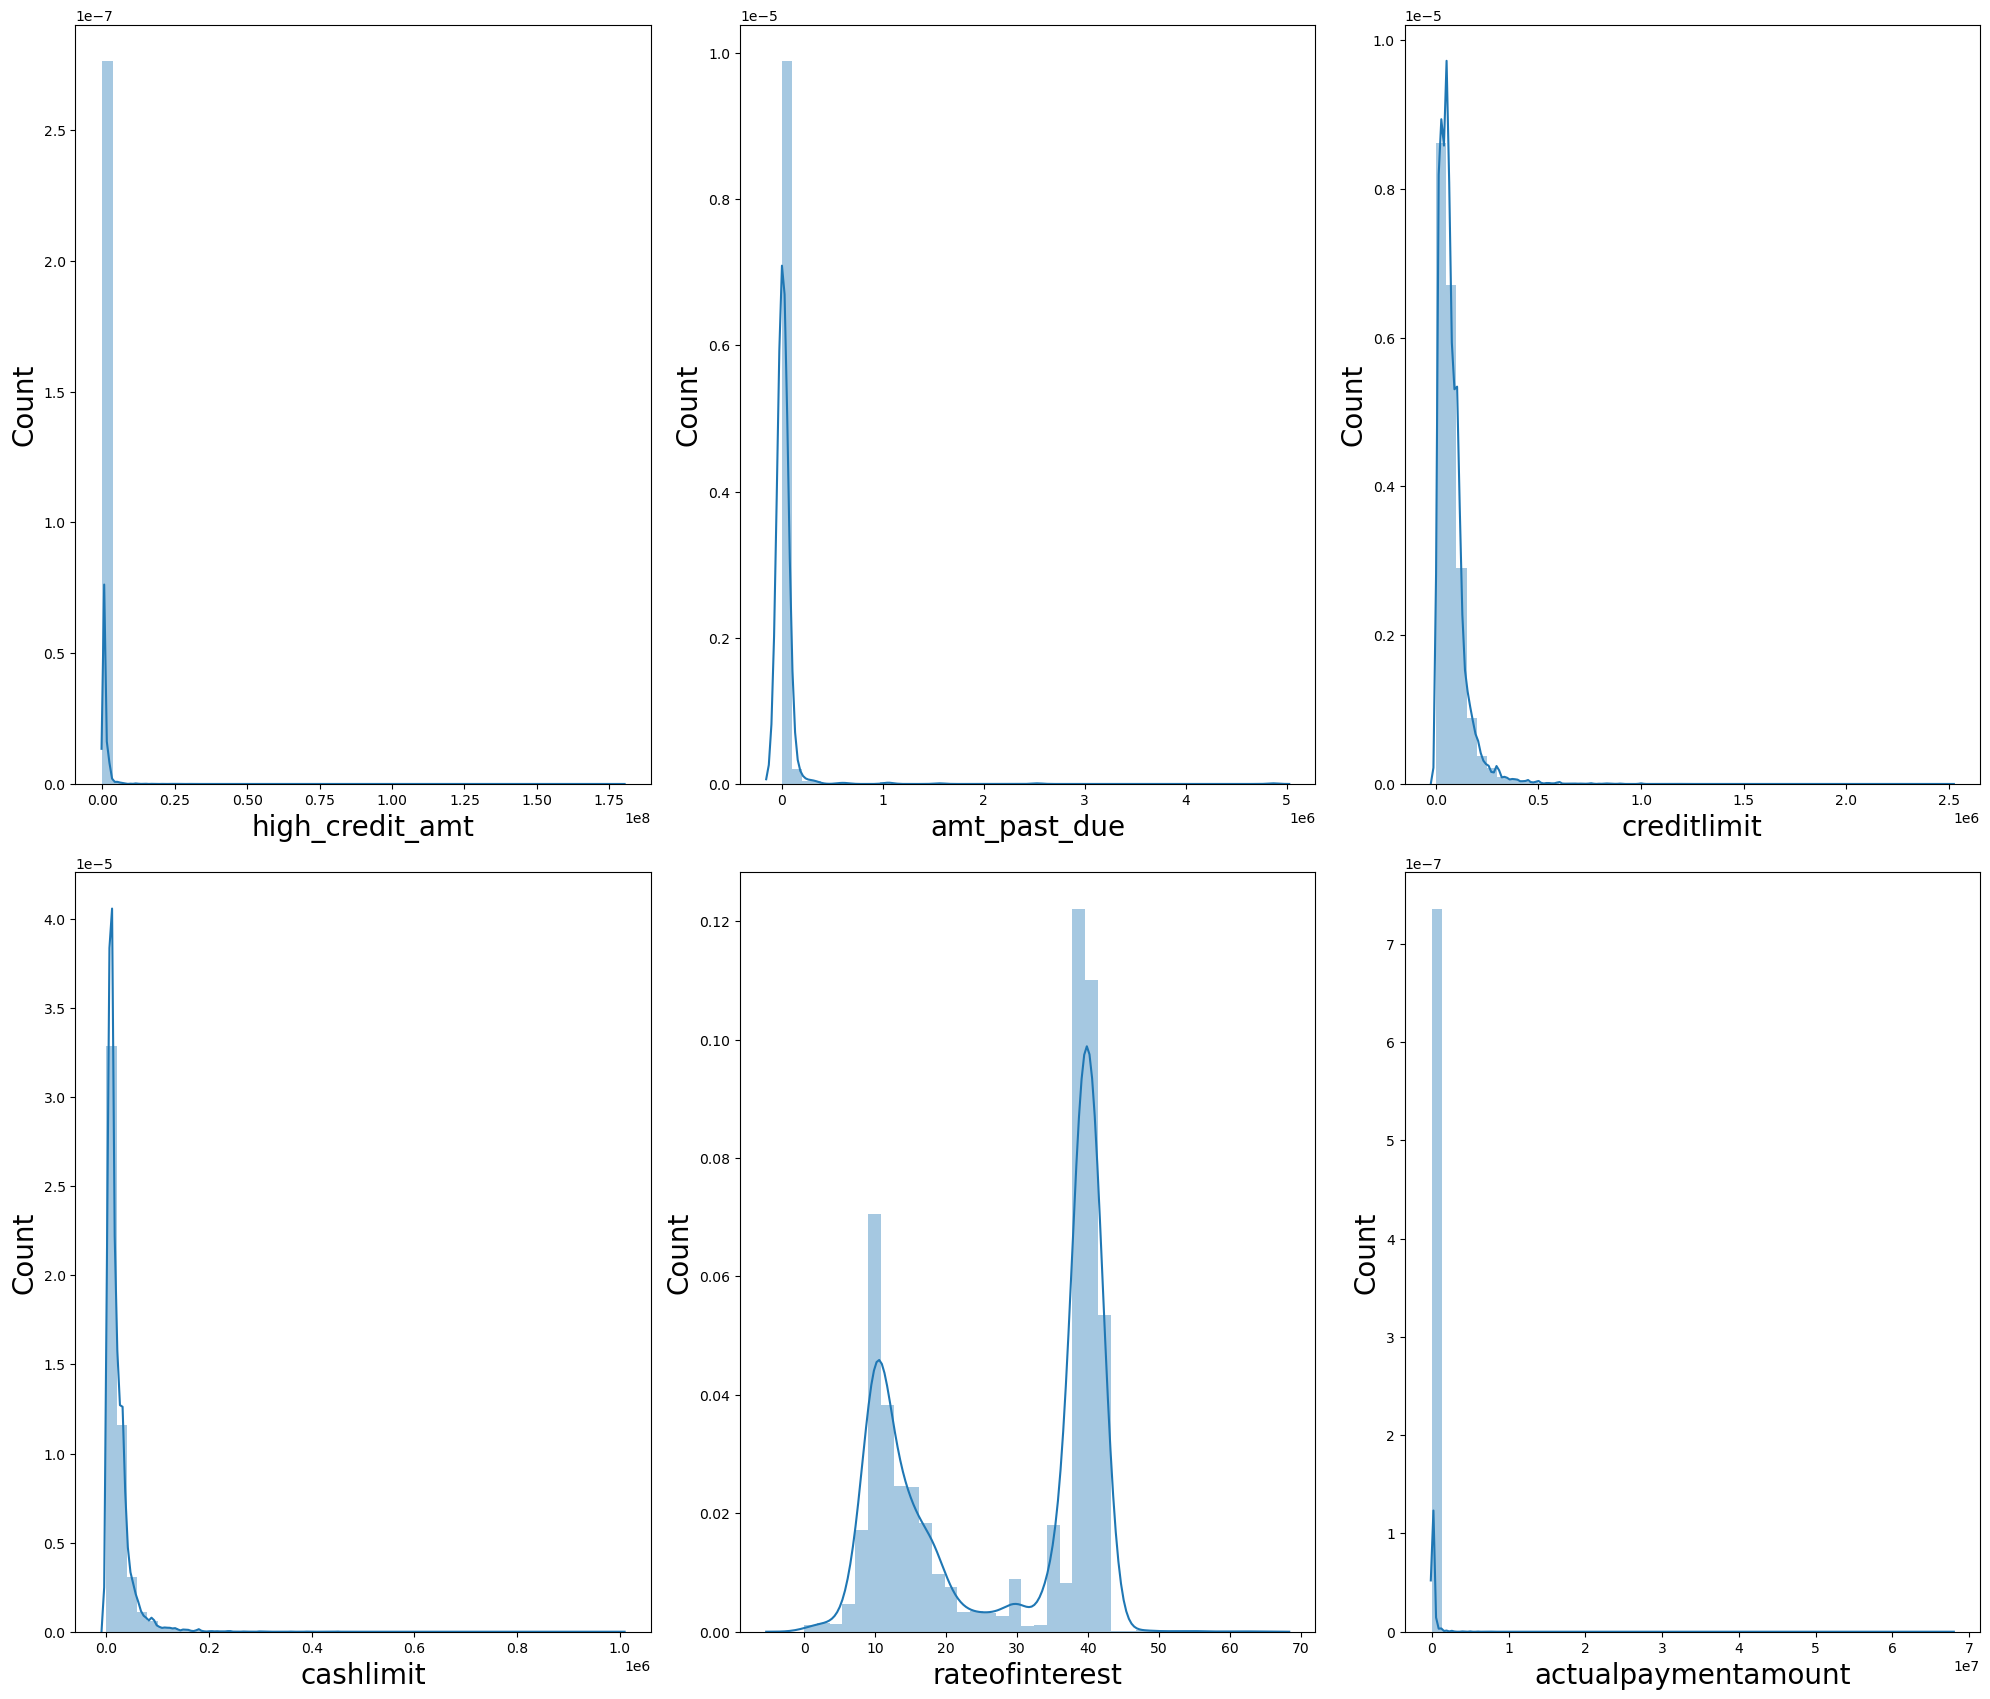

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,25))
plotnumber=1

for columns in acc_columns:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(acc_columns[columns],kde=True)
    plt.xlabel(columns,fontsize=20)
    plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Since these columns have continuous values and do not follow normal distribution, we will impute missing values by median of the respective columns.

In [40]:
new_cust_acc['rateofinterest']=new_cust_acc['rateofinterest'].fillna(new_cust_acc['rateofinterest'].median())

In [41]:
new_cust_acc['actualpaymentamount']=new_cust_acc['actualpaymentamount'].fillna(new_cust_acc['actualpaymentamount'].median())

In [42]:
new_cust_acc['high_credit_amt']=new_cust_acc['high_credit_amt'].fillna(new_cust_acc['high_credit_amt'].median())

In [43]:
new_cust_acc['amt_past_due']=new_cust_acc['amt_past_due'].fillna(new_cust_acc['amt_past_due'].median())

In [44]:
new_cust_acc['creditlimit']=new_cust_acc['creditlimit'].fillna(new_cust_acc['creditlimit'].median())

In [45]:
new_cust_acc['cashlimit']=new_cust_acc['cashlimit'].fillna(new_cust_acc['cashlimit'].median())

In [46]:
new_cust_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_no          186329 non-null  int64  
 1   high_credit_amt      186329 non-null  float64
 2   cur_balance_amt      186329 non-null  int64  
 3   amt_past_due         186329 non-null  float64
 4   creditlimit          186329 non-null  float64
 5   cashlimit            186329 non-null  float64
 6   rateofinterest       186329 non-null  float64
 7   actualpaymentamount  186329 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 11.4 MB


In [47]:
new_cust_acc

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount
0,12265,20900.0,0,1209.5,60000.0,12500.0,37.8,7590.0
1,12265,16201.0,10390,1209.5,14000.0,1400.0,37.8,5603.0
2,12265,41028.0,34420,1209.5,60000.0,12500.0,37.8,7590.0
3,15606,93473.0,0,1209.5,60000.0,12500.0,37.8,7590.0
4,15606,20250.0,13500,1209.5,60000.0,12500.0,37.8,7590.0
...,...,...,...,...,...,...,...,...
186324,1611,24228.0,24228,1209.5,60000.0,12500.0,37.8,7590.0
186325,1611,19584.0,0,1209.5,60000.0,12500.0,37.8,7590.0
186326,1611,50844.0,0,1209.5,60000.0,12500.0,37.8,7590.0
186327,1611,35587.0,0,1209.5,15000.0,6000.0,37.8,7590.0


In [48]:
new_cust_acc1=new_cust_acc.groupby(['customer_no']).sum()       # Grouping by column 'customer_no' and .sum() is providing sum value of all columns 
new_cust_acc1                                                   # That is,  output is generated after grouping and adding all the values in each column

,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount
customer_no,,,,,,,
1,8035733.5,4714857,2557561.0,1630000.0,380500.0,579.954,192526.0
2,1117595.0,30754,2419.0,1060000.0,12501.0,75.600,15180.0
3,121523.0,17864,1209.5,60000.0,12500.0,37.800,7590.0
4,12395111.0,1845569,20561.5,1796000.0,536000.0,587.140,116154.0
5,12953175.5,7973,8466.5,420000.0,87500.0,264.600,53130.0
...,...,...,...,...,...,...,...
23892,772824.0,485225,12095.0,629000.0,139700.0,323.600,116527.0
23893,27314.0,16393,1209.5,60000.0,12500.0,37.800,7590.0
23894,48841.0,2077,3628.5,134000.0,32000.0,113.400,22770.0


Since column 'customer_no' is the index here, so we need to reset index.

In [49]:
final_acc_data=pd.DataFrame(new_cust_acc1.reset_index())  
final_acc_data

,customer_no,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount
0,1,8035733.5,4714857,2557561.0,1630000.0,380500.0,579.954,192526.0
1,2,1117595.0,30754,2419.0,1060000.0,12501.0,75.600,15180.0
2,3,121523.0,17864,1209.5,60000.0,12500.0,37.800,7590.0
3,4,12395111.0,1845569,20561.5,1796000.0,536000.0,587.140,116154.0
4,5,12953175.5,7973,8466.5,420000.0,87500.0,264.600,53130.0
...,...,...,...,...,...,...,...,...
23891,23892,772824.0,485225,12095.0,629000.0,139700.0,323.600,116527.0
23892,23893,27314.0,16393,1209.5,60000.0,12500.0,37.800,7590.0
23893,23894,48841.0,2077,3628.5,134000.0,32000.0,113.400,22770.0
23894,23895,746015.0,370758,7257.0,404000.0,89700.0,202.650,38173.0


### Scaling of final_acc_data

In [50]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
acc_data_sc=sc.fit_transform(final_acc_data.drop(['customer_no'],axis=1))
acc_data_sc

array([[1.59089669e-02, 7.18626575e-02, 5.23173330e-01, ...,
        2.39971771e-01, 1.32973949e-01, 2.83117046e-03],
       [2.21211083e-03, 4.31155705e-02, 2.47531743e-04, ...,
        7.88345603e-03, 1.68331948e-02, 2.22157296e-04],
       [2.40040616e-04, 4.30364625e-02, 0.00000000e+00, ...,
        7.88282535e-03, 8.12875206e-03, 1.10497546e-04],
       ...,
       [9.61413727e-05, 4.29395752e-02, 4.95063486e-04, ...,
        2.01810168e-02, 2.55376375e-02, 3.33817045e-04],
       [1.47643926e-03, 4.52022293e-02, 1.23765872e-03, ...,
        5.65710498e-02, 4.60897939e-02, 5.60417193e-04],
       [2.44409149e-03, 4.84721324e-02, 1.45060355e-03, ...,
        3.17854640e-02, 3.42420802e-02, 3.51470760e-04]])

In [51]:
pd.DataFrame(acc_data_sc)

,0,1,2,3,4,5,6
0,0.015909,0.071863,0.523173,0.165517,0.239972,0.132974,0.002831
1,0.002212,0.043116,0.000248,0.107280,0.007883,0.016833,0.000222
2,0.000240,0.043036,0.000000,0.005109,0.007883,0.008129,0.000110
3,0.024540,0.054253,0.003961,0.182478,0.338042,0.134629,0.001708
4,0.025645,0.042976,0.001485,0.041890,0.055184,0.060355,0.000780
...,...,...,...,...,...,...,...
23891,0.001530,0.045905,0.002228,0.063244,0.088105,0.073942,0.001713
23892,0.000054,0.043027,0.000000,0.005109,0.007883,0.008129,0.000110
23893,0.000096,0.042940,0.000495,0.012669,0.020181,0.025538,0.000334
23894,0.001476,0.045202,0.001238,0.040255,0.056571,0.046090,0.000560


In [52]:
final_acc_data.columns

Index(['customer_no', 'high_credit_amt', 'cur_balance_amt', 'amt_past_due',
       'creditlimit', 'cashlimit', 'rateofinterest', 'actualpaymentamount'],
      dtype='object')

In [53]:
scaled_acc_data=pd.DataFrame(acc_data_sc,columns=['high_credit_amt', 'cur_balance_amt', 'amt_past_due',
       'creditlimit', 'cashlimit', 'rateofinterest', 'actualpaymentamount'])
scaled_acc_data

,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount
0,0.015909,0.071863,0.523173,0.165517,0.239972,0.132974,0.002831
1,0.002212,0.043116,0.000248,0.107280,0.007883,0.016833,0.000222
2,0.000240,0.043036,0.000000,0.005109,0.007883,0.008129,0.000110
3,0.024540,0.054253,0.003961,0.182478,0.338042,0.134629,0.001708
4,0.025645,0.042976,0.001485,0.041890,0.055184,0.060355,0.000780
...,...,...,...,...,...,...,...
23891,0.001530,0.045905,0.002228,0.063244,0.088105,0.073942,0.001713
23892,0.000054,0.043027,0.000000,0.005109,0.007883,0.008129,0.000110
23893,0.000096,0.042940,0.000495,0.012669,0.020181,0.025538,0.000334
23894,0.001476,0.045202,0.001238,0.040255,0.056571,0.046090,0.000560


In [54]:
column_customer= pd.DataFrame(final_acc_data['customer_no'])
column_customer

,customer_no
0,1
1,2
2,3
3,4
4,5
...,...
23891,23892
23892,23893
23893,23894
23894,23895


In [55]:
# Cocatenating both
final_account_data=pd.concat([scaled_acc_data,column_customer],axis=1)
final_account_data

,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount,customer_no
0,0.015909,0.071863,0.523173,0.165517,0.239972,0.132974,0.002831,1
1,0.002212,0.043116,0.000248,0.107280,0.007883,0.016833,0.000222,2
2,0.000240,0.043036,0.000000,0.005109,0.007883,0.008129,0.000110,3
3,0.024540,0.054253,0.003961,0.182478,0.338042,0.134629,0.001708,4
4,0.025645,0.042976,0.001485,0.041890,0.055184,0.060355,0.000780,5
...,...,...,...,...,...,...,...,...
23891,0.001530,0.045905,0.002228,0.063244,0.088105,0.073942,0.001713,23892
23892,0.000054,0.043027,0.000000,0.005109,0.007883,0.008129,0.000110,23893
23893,0.000096,0.042940,0.000495,0.012669,0.020181,0.025538,0.000334,23894
23894,0.001476,0.045202,0.001238,0.040255,0.056571,0.046090,0.000560,23895


In [56]:
final_account_data

,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount,customer_no
0,0.015909,0.071863,0.523173,0.165517,0.239972,0.132974,0.002831,1
1,0.002212,0.043116,0.000248,0.107280,0.007883,0.016833,0.000222,2
2,0.000240,0.043036,0.000000,0.005109,0.007883,0.008129,0.000110,3
3,0.024540,0.054253,0.003961,0.182478,0.338042,0.134629,0.001708,4
4,0.025645,0.042976,0.001485,0.041890,0.055184,0.060355,0.000780,5
...,...,...,...,...,...,...,...,...
23891,0.001530,0.045905,0.002228,0.063244,0.088105,0.073942,0.001713,23892
23892,0.000054,0.043027,0.000000,0.005109,0.007883,0.008129,0.000110,23893
23893,0.000096,0.042940,0.000495,0.012669,0.020181,0.025538,0.000334,23894
23894,0.001476,0.045202,0.001238,0.040255,0.056571,0.046090,0.000560,23895


In [57]:
final_account_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   high_credit_amt      23896 non-null  float64
 1   cur_balance_amt      23896 non-null  float64
 2   amt_past_due         23896 non-null  float64
 3   creditlimit          23896 non-null  float64
 4   cashlimit            23896 non-null  float64
 5   rateofinterest       23896 non-null  float64
 6   actualpaymentamount  23896 non-null  float64
 7   customer_no          23896 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.5 MB


## Data Preprocessing of demographic data

In [58]:
pd.set_option('display.max_columns', None)  # To see all columns
demog_data

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650.0,2.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,159,4284,4284,NaN,1.0,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,NaN,Y,State Bank of India,0.0,01-Jun-13,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1965-0,21.0,15.0,400610.0,0.0,2.0,90000.0,Nov-00,21.0,R,NaN,NaN,0000-00-00,0.0,98332XXXXX,1.0,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760.0,1.0,Card Setup,14.0,1200000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,1.0,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,17.0,NaN,Y,Y,N,NaN,Y,1969-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,99455XXXXX,1.0,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774.0,1.0,Card Setup,14.0,700000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,91,B001,4077,NaN,2.0,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,NaN,PAN Card,AFAPNXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,3.0,17.0,NaN,N,Y,N,NaN,Y,1966-0,17.0,12.0,560042.0,0.0,2.0,1.0,Nov-00,17.0,R,NaN,NaN,0000-00-00,0.0,98456XXXXX,1.0,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770.0,1.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,157,5107,5107,NaN,1.0,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,NaN,Y,HDFC Bank,0.0,NaN,17-Jun-16,1.0,21.0,NaN,Y,Y,N,NaN,Y,1988-0,21.0,16.0,411001.0,0.0,2.0,100000.0,Nov-00,21.0,R,NaN,NaN,6/15/65,1.0,98220XXXXX,1.0,N,0
4,06-May-15,5,30-Apr-15,Insignia,NaN,NaN,3.0,Card Setup,14.0,500000.0,NaN,NaN,NaN,Y,IS1,NaN,0.0,100,D016,4564,NaN,1.0,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,NaN,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,Y,Y,N,NaN,Y,1995-0,13.0,3.0,122009.0,0.0,2.0,300000.0,Nov-00,13.0,R,NaN,NaN,0000-00-00,0.0,98111XXXXX,1.0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704.0,1.0,Card Setup,14.0,119000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA05,MA01,NaN,NaN,1.0,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2.0,0.0,Graduate,New Delhi,110045.0,1988.0,10.0,Paren,Y,1.0,33000.0,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015.0,6.0,0.0,6.0,Gurgaon,122001.0,NaN,PAN Card,CUQPSXXX

In [59]:
demog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt_opened    23896 non-null  object 
 1   customer_no  23896 non-null  int64  
 2   entry_time   23881 non-null  object 
 3   feature_1    23881 non-null  object 
 4   feature_2    21060 non-null  object 
 5   feature_3    21060 non-null  float64
 6   feature_4    23881 non-null  float64
 7   feature_5    23881 non-null  object 
 8   feature_6    23881 non-null  float64
 9   feature_7    23881 non-null  float64
 10  feature_8    1261 non-null   object 
 11  feature_9    1261 non-null   object 
 12  feature_10   51 non-null     object 
 13  feature_11   23881 non-null  object 
 14  feature_12   23881 non-null  object 
 15  feature_13   10892 non-null  object 
 16  feature_14   16163 non-null  float64
 17  feature_15   23873 non-null  object 
 18  feature_16   23869 non-null  object 
 19  feat

In [60]:
demog_data['feature_5'].unique() # we will drop it since this column contains only one element(one unique or distinct value)

array(['Card Setup', nan], dtype=object)

In [62]:
demog_data['feature_6'].value_counts() # we will drop it since this column contains only one element(one unique or distinct value)

14.0    23881
Name: feature_6, dtype: int64

### Dropping the columns which have huge percentage of missing values and the columns which are not required like columns containing phone number, email-id, etc.

In [63]:
new_demog_data=demog_data.drop(['dt_opened','entry_time','feature_2','feature_5','feature_6','feature_8','feature_9','feature_10','feature_13',
                              'feature_14','feature_17','feature_18','feature_20','feature_21','feature_22','feature_24','feature_38','feature_45',
                             'feature_47','feature_48','feature_49','feature_51','feature_53','feature_54','feature_57','feature_59','feature_61','feature_63',
                             'feature_70','feature_73','feature_74','feature_75','feature_77'],axis=1)

In [64]:
new_demog_data.head()

,customer_no,feature_1,feature_3,feature_4,feature_7,feature_11,feature_12,feature_15,feature_16,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_50,feature_52,feature_55,feature_56,feature_58,feature_60,feature_62,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,feature_79,Bad_label
0,1,Insignia,650.0,2.0,500000.0,Y,IS1,159,4284,1.0,N,1.0,2.0,NaN,Mumbai / Navi Mumbai / Thane,400610.0,1965.0,0.0,Self,Y,2.0,90000.0,NaN,NaN,0.0,0.0,0.0,0.0,Mumbai,400059.0,PAN Card,Y,0.0,1.0,21.0,Y,N,Y,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,R,0.0,1.0,N,0
1,2,Insignia,760.0,1.0,1200000.0,Y,IS1,91,B001,1.0,N,1.0,2.0,NaN,Bengaluru,560042.0,1969.0,0.0,Self,Y,2.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,PAN Card,N,0.0,1.0,17.0,Y,N,Y,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0
2,3,Insignia,774.0,1.0,700000.0,Y,IS1,91,B001,2.0,N,1.0,0.0,NaN,Bengaluru,560042.0,1966.0,0.0,Self,Y,2.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,Bangalore,560042.0,PAN Card,N,0.0,3.0,17.0,N,N,Y,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,R,0.0,1.0,N,0
3,4,Insignia,770.0,1.0,500000.0,Y,IS1,157,5107,1.0,N,1.0,3.0,NaN,Pune,411001.0,1988.0,0.0,Self,Y,2.0,100000.0,NaN,NaN,0.0,0.0,0.0,0.0,Pune,411026.0,PAN Card,Y,0.0,1.0,21.0,Y,N,Y,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,R,1.0,1.0,N,0
4,5,Insignia,NaN,3.0,500000.0,Y,IS1,100,D016,1.0,N,1.0,3.0,NaN,Gurgaon,122009.0,1995.0,0.0,Self,Y,2.0,300000.0,NaN,NaN,0.0,0.0,0.0,0.0,Gurgaon,122009.0,PAN Card,N,0.0,1.0,13.0,Y,N,Y,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,R,0.0,1.0,N,0


In [65]:
new_demog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_no  23896 non-null  int64  
 1   feature_1    23881 non-null  object 
 2   feature_3    21060 non-null  float64
 3   feature_4    23881 non-null  float64
 4   feature_7    23881 non-null  float64
 5   feature_11   23881 non-null  object 
 6   feature_12   23881 non-null  object 
 7   feature_15   23873 non-null  object 
 8   feature_16   23869 non-null  object 
 9   feature_19   23881 non-null  float64
 10  feature_23   23881 non-null  object 
 11  feature_25   23881 non-null  float64
 12  feature_26   23881 non-null  float64
 13  feature_27   20259 non-null  object 
 14  feature_28   23881 non-null  object 
 15  feature_29   23881 non-null  float64
 16  feature_30   23881 non-null  float64
 17  feature_31   23881 non-null  float64
 18  feature_32   23881 non-null  object 
 19  feat

### Imputing Missing Values
First for categorical data by repective mode of columns and then for numerical data by respective median of columns.

In [66]:
categorical_attribute=['feature_1','feature_12','feature_16','feature_23','feature_27','feature_28','feature_32','feature_33',
                      'feature_36','feature_37','feature_43','feature_46','feature_50','feature_58','feature_60',
                      'feature_62','feature_72','feature_79']

import statistics

for i in categorical_attribute:
    mode=statistics.mode(new_demog_data[i])
    new_demog_data[i].fillna(mode,inplace=True)
    
new_demog_data[categorical_attribute].isnull().sum()


feature_1     0
feature_12    0
feature_16    0
feature_23    0
feature_27    0
feature_28    0
feature_32    0
feature_33    0
feature_36    0
feature_37    0
feature_43    0
feature_46    0
feature_50    0
feature_58    0
feature_60    0
feature_62    0
feature_72    0
feature_79    0
dtype: int64

In [67]:
# Creating Dataframe of categorical attribute 
demog_cat_attribute=new_demog_data[['customer_no','feature_1','feature_12','feature_16','feature_23','feature_27','feature_28','feature_32','feature_33',
                      'feature_36','feature_37','feature_43','feature_46','feature_50','feature_58','feature_60',
                      'feature_62','feature_72','feature_79']]
demog_cat_attribute

,customer_no,feature_1,feature_12,feature_16,feature_23,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_50,feature_58,feature_60,feature_62,feature_72,feature_79
0,1,Insignia,IS1,4284,N,Graduate,Mumbai / Navi Mumbai / Thane,Self,Y,Private Ltd. Co.,Banking/Financial Services,Mumbai,PAN Card,Y,Y,N,Y,R,N
1,2,Insignia,IS1,B001,N,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,N,Y,N,Y,R,N
2,3,Insignia,IS1,B001,N,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,N,N,N,Y,R,N
3,4,Insignia,IS1,5107,N,Graduate,Pune,Self,Y,Private Ltd. Co.,Banking/Financial Services,Pune,PAN Card,Y,Y,N,Y,R,N
4,5,Insignia,IS1,D016,N,Graduate,Gurgaon,Self,Y,Private Ltd. Co.,Banking/Financial Services,Gurgaon,PAN Card,N,Y,N,Y,R,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,23892,Platinum Deligh,PD1,MA01,N,Graduate,New Delhi,Paren,Y,Private Ltd. Co.,Others,Gurgaon,PAN Card,Y,N,N,Y,R,N
23892,23893,Platinum Deligh,PD1,AS33,N,Graduate,New Delhi,Rente,N,Private Ltd. Co.,Others,New Delhi,PAN Card,N,N,N,Y,O,N
23893,23894,Platinum Maxima,PM1,D066,Y,Graduate,New Delhi,Paren,Y,Private Ltd. Co.,Health Care,Gurgaon,PAN Card,Y,N,N,Y,R,N
23894,23895,Platinum Deligh,PD1,G011,N,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,New Delhi,PAN Card,Y,N,N,Y,R,N


In [68]:
demog_cat_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_no  23896 non-null  int64 
 1   feature_1    23896 non-null  object
 2   feature_12   23896 non-null  object
 3   feature_16   23896 non-null  object
 4   feature_23   23896 non-null  object
 5   feature_27   23896 non-null  object
 6   feature_28   23896 non-null  object
 7   feature_32   23896 non-null  object
 8   feature_33   23896 non-null  object
 9   feature_36   23896 non-null  object
 10  feature_37   23896 non-null  object
 11  feature_43   23896 non-null  object
 12  feature_46   23896 non-null  object
 13  feature_50   23896 non-null  object
 14  feature_58   23896 non-null  object
 15  feature_60   23896 non-null  object
 16  feature_62   23896 non-null  object
 17  feature_72   23896 non-null  object
 18  feature_79   23896 non-null  object
dtypes: int64(1), object(18)
m

In [69]:
new_demog_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_no  23896 non-null  int64  
 1   feature_1    23896 non-null  object 
 2   feature_3    21060 non-null  float64
 3   feature_4    23881 non-null  float64
 4   feature_7    23881 non-null  float64
 5   feature_11   23881 non-null  object 
 6   feature_12   23896 non-null  object 
 7   feature_15   23873 non-null  object 
 8   feature_16   23896 non-null  object 
 9   feature_19   23881 non-null  float64
 10  feature_23   23896 non-null  object 
 11  feature_25   23881 non-null  float64
 12  feature_26   23881 non-null  float64
 13  feature_27   23896 non-null  object 
 14  feature_28   23896 non-null  object 
 15  feature_29   23881 non-null  float64
 16  feature_30   23881 non-null  float64
 17  feature_31   23881 non-null  float64
 18  feature_32   23896 non-null  object 
 19  feat

In [70]:
attributes = ['customer_no','feature_3', 'feature_4', 'feature_7', 'feature_19', 'feature_25', 'feature_26', 'feature_29', 'feature_30',
           'feature_31', 'feature_34', 'feature_35', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
           'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_71',
           'feature_76', 'feature_78']

# Iterate through each attribute and fill in missing values with its median
for i in attributes:
    inf = (new_demog_data[i]).info()
    print(inf)

<class 'pandas.core.series.Series'>
RangeIndex: 23896 entries, 0 to 23895
Series name: customer_no
Non-Null Count  Dtype
--------------  -----
23896 non-null  int64
dtypes: int64(1)
memory usage: 186.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 23896 entries, 0 to 23895
Series name: feature_3
Non-Null Count  Dtype  
--------------  -----  
21060 non-null  float64
dtypes: float64(1)
memory usage: 186.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 23896 entries, 0 to 23895
Series name: feature_4
Non-Null Count  Dtype  
--------------  -----  
23881 non-null  float64
dtypes: float64(1)
memory usage: 186.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 23896 entries, 0 to 23895
Series name: feature_7
Non-Null Count  Dtype  
--------------  -----  
23881 non-null  float64
dtypes: float64(1)
memory usage: 186.8 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 23896 entries, 0 to 23895
Series name: feature_19
Non-Null Count  Dtype  
--------------  ----

In [72]:
# Import the statistics module
import statistics

# List of attributes
attributes = ['feature_3', 'feature_4', 'feature_7', 'feature_19', 'feature_25', 'feature_26', 'feature_29', 'feature_30',
           'feature_31', 'feature_34', 'feature_35', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_44', 'feature_52',
           'feature_55', 'feature_56', 'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68', 'feature_69', 'feature_71',
           'feature_76', 'feature_78']

# Iterate through each attribute and fill in missing values with its median
for i in attributes:
    median_val = statistics.median(new_demog_data[i])
    new_demog_data[i].fillna(median_val, inplace=True)

# Check for any remaining missing values
new_demog_data[attributes].isnull().sum()


feature_3     0
feature_4     0
feature_7     0
feature_19    0
feature_25    0
feature_26    0
feature_29    0
feature_30    0
feature_31    0
feature_34    0
feature_35    0
feature_39    0
feature_40    0
feature_41    0
feature_42    0
feature_44    0
feature_52    0
feature_55    0
feature_56    0
feature_64    0
feature_65    0
feature_66    0
feature_67    0
feature_68    0
feature_69    0
feature_71    0
feature_76    0
feature_78    0
dtype: int64

In [73]:
# To see median of each column in attribute list
new_demog_data.median()

customer_no     11948.5
feature_3         715.0
feature_4           3.0
feature_7      104000.0
feature_19          1.0
feature_25          1.0
feature_26          0.0
feature_29     110094.0
feature_30       2005.0
feature_31          0.0
feature_34          1.0
feature_35      30000.0
feature_39       2010.0
feature_40          2.0
feature_41          6.0
feature_42          0.0
feature_44     122001.0
feature_52      50000.0
feature_55          1.0
feature_56         10.0
feature_64         10.0
feature_65        157.0
feature_66     122015.0
feature_67          0.0
feature_68          1.0
feature_69      30000.0
feature_71         10.0
feature_76          0.0
feature_78          1.0
Bad_label           0.0
dtype: float64

In [74]:
# Creating Dataframe of numerical columns of demographical dataset
demog_attribute=new_demog_data[['customer_no','feature_3','feature_4','feature_7','feature_19','feature_25','feature_26','feature_29','feature_30',
           'feature_31','feature_34','feature_35','feature_39','feature_40','feature_41','feature_42','feature_44','feature_52',
           'feature_55','feature_56','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_71',
           'feature_76','feature_78','Bad_label']]
demog_attribute

,customer_no,feature_3,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78,Bad_label
0,1,650.0,2.0,500000.0,1.0,1.0,2.0,400610.0,1965.0,0.0,2.0,90000.0,0.0,0.0,0.0,0.0,400059.0,0.0,1.0,21.0,21.0,15.0,400610.0,0.0,2.0,90000.0,21.0,0.0,1.0,0
1,2,760.0,1.0,1200000.0,1.0,1.0,2.0,560042.0,1969.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,1.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,0
2,3,774.0,1.0,700000.0,2.0,1.0,0.0,560042.0,1966.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,560042.0,0.0,3.0,17.0,17.0,12.0,560042.0,0.0,2.0,1.0,17.0,0.0,1.0,0
3,4,770.0,1.0,500000.0,1.0,1.0,3.0,411001.0,1988.0,0.0,2.0,100000.0,0.0,0.0,0.0,0.0,411026.0,0.0,1.0,21.0,21.0,16.0,411001.0,0.0,2.0,100000.0,21.0,1.0,1.0,0
4,5,704.0,3.0,500000.0,1.0,1.0,3.0,122009.0,1995.0,0.0,2.0,300000.0,0.0,0.0,0.0,0.0,122009.0,0.0,1.0,13.0,13.0,3.0,122009.0,0.0,2.0,300000.0,13.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,23892,704.0,1.0,119000.0,1.0,2.0,0.0,110045.0,1988.0,10.0,1.0,33000.0,2015.0,6.0,0.0,6.0,122001.0,99000.0,1.0,10.0,10.0,157.0,110045.0,0.0,1.0,33000.0,13.0,0.0,1.0,0
23892,23893,704.0,2.0,35000.0,1.0,2.0,0.0,110037.0,2014.0,12.0,1.0,1.0,2012.0,12.0,3.0,0.0,110037.0,0.0,1.0,10.0,33.0,102.0,282001.0,1.0,1.0,1.0,10.0,0.0,1.0,0
23893,23894,748.0,3.0,68000.0,1.0,2.0,0.0,110033.0,1986.0,0.0,1.0,1.0,2015.0,1.0,3.0,0.0,122016.0,52000.0,1.0,10.0,10.0,157.0,110033.0,0.0,1.0,1.0,13.0,0.0,1.0,0
23894,23895,740.0,3.0,158000.0,1.0,1.0,0.0,110095.0,2010.0,0.0,2.0,25000.0,0.0,0.0,0.0,0.0,110095.0,65000.0,2.0,10.0,10.0,157.0,110095.0,0.0,2.0,25000.0,10.0,0.0,1.0,0


### Scaling the numerical columns in demographic dataset

In [75]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
demog_attribute_sc=sc.fit_transform(demog_attribute.drop(['customer_no','Bad_label'],axis=1))
demog_attribute_sc

array([[0.72575251, 0.5       , 0.41084634, ..., 0.57575758, 0.        ,
        0.        ],
       [0.8483835 , 0.        , 0.98603122, ..., 0.45454545, 0.        ,
        0.        ],
       [0.86399108, 0.        , 0.57518488, ..., 0.45454545, 0.        ,
        0.        ],
       ...,
       [0.83500557, 1.        , 0.0558751 , ..., 0.33333333, 0.        ,
        0.        ],
       [0.82608696, 1.        , 0.12982744, ..., 0.24242424, 0.        ,
        0.        ],
       [0.76811594, 0.        , 0.08709942, ..., 0.93939394, 0.        ,
        0.        ]])

In [76]:
pd.DataFrame(demog_attribute_sc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.725753,0.5,0.410846,0.0,0.0,0.2,0.482544,0.019608,0.000000,0.5,0.006000,0.000000,0.000000,0.000000,0.000000,0.561722,0.000000,0.000000,0.575758,0.575758,0.001399,0.380179,0.0,0.5,0.006000,0.575758,0.00,0.0
1,0.848384,0.0,0.986031,0.0,0.0,0.2,0.747274,0.098039,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.000000,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
2,0.863991,0.0,0.575185,1.0,0.0,0.0,0.747274,0.039216,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.666667,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
3,0.859532,0.0,0.410846,0.0,0.0,0.3,0.499797,0.470588,0.000000,0.5,0.006667,0.000000,0.000000,0.000000,0.000000,0.577121,0.000000,0.000000,0.575758,0.575758,0.001499,0.393773,0.0,0.5,0.006667,0.575758,0.25,0.0
4,0.785953,1.0,0.410846,0.0,0.0,0.3,0.019939,0.607843,0.000000,0.5,0.020000,0.000000,0.000000,0.000000,0.000000,0.171313,0.000000,0.000000,0.333333,0.333333,0.000200,0.015709,0.0,0.5,0.020000,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,0.785953,0.0,0.097781,0.0,1.0,0.0,0.000073,0.470588,0.833333,0.0,0.002200,1.000000,0.500000,0.000000,0.545455,0.171301,0.026211,0.000000,0.242424,0.242424,0.015589,0.000058,0.0,0.0,0.002200,0.333333,0.00,0.0
23892,0.785953,0.5,0.028759,0.0,1.0,0.0,0.000060,0.980392,1.000000,0.0,0.000000,0.998511,1.000000,0.272727,0.000000,0.154503,0.000000,0.000000,0.242424,0.939394,0.010093,0.225013,1.0,0.0,0.000000,0.242424,0.00,0.0
23893,0.835006,1.0,0.055875,0.0,1.0,0.0,0.000053,0.431373,0.000000,0.0,0.000000,1.000000,0.083333,0.272727,0.000000,0.171322,0.013768,0.000000,0.242424,0.242424,0.015589,0.000042,0.0,0.0,0.000000,0.333333,0.00,0.0
23894,0.826087,1.0,0.129827,0.0,0.0,0.0,0.000156,0.901961,0.000000,0.5,0.001667,0.000000,0.000000,0.000000,0.000000,0.154584,0.017209,0.333333,0.242424,0.242424,0.015589,0.000123,0.0,0.5,0.001667,0.242424,0.00,0.0


In [77]:
# Keeping unscaled column 'Bad_label' into another dataframe
Output=pd.DataFrame(demog_attribute[['customer_no','Bad_label']])
Output

,customer_no,Bad_label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
23891,23892,0
23892,23893,0
23893,23894,0
23894,23895,0


In [78]:
demog_attribute.columns

Index(['customer_no', 'feature_3', 'feature_4', 'feature_7', 'feature_19',
       'feature_25', 'feature_26', 'feature_29', 'feature_30', 'feature_31',
       'feature_34', 'feature_35', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_44', 'feature_52', 'feature_55', 'feature_56',
       'feature_64', 'feature_65', 'feature_66', 'feature_67', 'feature_68',
       'feature_69', 'feature_71', 'feature_76', 'feature_78', 'Bad_label'],
      dtype='object')

In [79]:
scaled_demo_data=pd.DataFrame(demog_attribute_sc,columns=['feature_3', 'feature_4', 'feature_7',
       'feature_19', 'feature_25', 'feature_26', 'feature_29', 'feature_30',
       'feature_31', 'feature_34', 'feature_35', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_44', 'feature_52', 'feature_55',
       'feature_56', 'feature_64', 'feature_65', 'feature_66', 'feature_67',
       'feature_68', 'feature_69', 'feature_71', 'feature_76', 'feature_78'])

In [80]:
scaled_demo_data

,feature_3,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
0,0.725753,0.5,0.410846,0.0,0.0,0.2,0.482544,0.019608,0.000000,0.5,0.006000,0.000000,0.000000,0.000000,0.000000,0.561722,0.000000,0.000000,0.575758,0.575758,0.001399,0.380179,0.0,0.5,0.006000,0.575758,0.00,0.0
1,0.848384,0.0,0.986031,0.0,0.0,0.2,0.747274,0.098039,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.000000,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
2,0.863991,0.0,0.575185,1.0,0.0,0.0,0.747274,0.039216,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.666667,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
3,0.859532,0.0,0.410846,0.0,0.0,0.3,0.499797,0.470588,0.000000,0.5,0.006667,0.000000,0.000000,0.000000,0.000000,0.577121,0.000000,0.000000,0.575758,0.575758,0.001499,0.393773,0.0,0.5,0.006667,0.575758,0.25,0.0
4,0.785953,1.0,0.410846,0.0,0.0,0.3,0.019939,0.607843,0.000000,0.5,0.020000,0.000000,0.000000,0.000000,0.000000,0.171313,0.000000,0.000000,0.333333,0.333333,0.000200,0.015709,0.0,0.5,0.020000,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,0.785953,0.0,0.097781,0.0,1.0,0.0,0.000073,0.470588,0.833333,0.0,0.002200,1.000000,0.500000,0.000000,0.545455,0.171301,0.026211,0.000000,0.242424,0.242424,0.015589,0.000058,0.0,0.0,0.002200,0.333333,0.00,0.0
23892,0.785953,0.5,0.028759,0.0,1.0,0.0,0.000060,0.980392,1.000000,0.0,0.000000,0.998511,1.000000,0.272727,0.000000,0.154503,0.000000,0.000000,0.242424,0.939394,0.010093,0.225013,1.0,0.0,0.000000,0.242424,0.00,0.0
23893,0.835006,1.0,0.055875,0.0,1.0,0.0,0.000053,0.431373,0.000000,0.0,0.000000,1.000000,0.083333,0.272727,0.000000,0.171322,0.013768,0.000000,0.242424,0.242424,0.015589,0.000042,0.0,0.0,0.000000,0.333333,0.00,0.0
23894,0.826087,1.0,0.129827,0.0,0.0,0.0,0.000156,0.901961,0.000000,0.5,0.001667,0.000000,0.000000,0.000000,0.000000,0.154584,0.017209,0.333333,0.242424,0.242424,0.015589,0.000123,0.0,0.5,0.001667,0.242424,0.00,0.0


In [81]:
# Concatenating both 
demographic_data=pd.concat([Output,scaled_demo_data],axis=1)
demographic_data

,customer_no,Bad_label,feature_3,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
0,1,0,0.725753,0.5,0.410846,0.0,0.0,0.2,0.482544,0.019608,0.000000,0.5,0.006000,0.000000,0.000000,0.000000,0.000000,0.561722,0.000000,0.000000,0.575758,0.575758,0.001399,0.380179,0.0,0.5,0.006000,0.575758,0.00,0.0
1,2,0,0.848384,0.0,0.986031,0.0,0.0,0.2,0.747274,0.098039,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.000000,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
2,3,0,0.863991,0.0,0.575185,1.0,0.0,0.0,0.747274,0.039216,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.666667,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
3,4,0,0.859532,0.0,0.410846,0.0,0.0,0.3,0.499797,0.470588,0.000000,0.5,0.006667,0.000000,0.000000,0.000000,0.000000,0.577121,0.000000,0.000000,0.575758,0.575758,0.001499,0.393773,0.0,0.5,0.006667,0.575758,0.25,0.0
4,5,0,0.785953,1.0,0.410846,0.0,0.0,0.3,0.019939,0.607843,0.000000,0.5,0.020000,0.000000,0.000000,0.000000,0.000000,0.171313,0.000000,0.000000,0.333333,0.333333,0.000200,0.015709,0.0,0.5,0.020000,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,23892,0,0.785953,0.0,0.097781,0.0,1.0,0.0,0.000073,0.470588,0.833333,0.0,0.002200,1.000000,0.500000,0.000000,0.545455,0.171301,0.026211,0.000000,0.242424,0.242424,0.015589,0.000058,0.0,0.0,0.002200,0.333333,0.00,0.0
23892,23893,0,0.785953,0.5,0.028759,0.0,1.0,0.0,0.000060,0.980392,1.000000,0.0,0.000000,0.998511,1.000000,0.272727,0.000000,0.154503,0.000000,0.000000,0.242424,0.939394,0.010093,0.225013,1.0,0.0,0.000000,0.242424,0.00,0.0
23893,23894,0,0.835006,1.0,0.055875,0.0,1.0,0.0,0.000053,0.431373,0.000000,0.0,0.000000,1.000000,0.083333,0.272727,0.000000,0.171322,0.013768,0.000000,0.242424,0.242424,0.015589,0.000042,0.0,0.0,0.000000,0.333333,0.00,0.0
23894,23895,0,0.826087,1.0,0.129827,0.0,0.0,0.0,0.000156,0.901961,0.000000,0.5,0.001667,0.000000,0.000000,0.000000,0.000000,0.154584,0.017209,0.333333,0.242424,0.242424,0.015589,0.000123,0.0,0.5,0.001667,0.242424,0.00,0.0


In [82]:
# Merging categorical dataframe and numerical dataframeof demographic dataset
final_demog_data=demog_cat_attribute.merge(demographic_data,on='customer_no')
final_demog_data

,customer_no,feature_1,feature_12,feature_16,feature_23,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_50,feature_58,feature_60,feature_62,feature_72,feature_79,Bad_label,feature_3,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
0,1,Insignia,IS1,4284,N,Graduate,Mumbai / Navi Mumbai / Thane,Self,Y,Private Ltd. Co.,Banking/Financial Services,Mumbai,PAN Card,Y,Y,N,Y,R,N,0,0.725753,0.5,0.410846,0.0,0.0,0.2,0.482544,0.019608,0.000000,0.5,0.006000,0.000000,0.000000,0.000000,0.000000,0.561722,0.000000,0.000000,0.575758,0.575758,0.001399,0.380179,0.0,0.5,0.006000,0.575758,0.00,0.0
1,2,Insignia,IS1,B001,N,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,N,Y,N,Y,R,N,0,0.848384,0.0,0.986031,0.0,0.0,0.2,0.747274,0.098039,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.000000,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
2,3,Insignia,IS1,B001,N,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,N,N,N,Y,R,N,0,0.863991,0.0,0.575185,1.0,0.0,0.0,0.747274,0.039216,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.666667,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
3,4,Insignia,IS1,5107,N,Graduate,Pune,Self,Y,Private Ltd. Co.,Banking/Financial Services,Pune,PAN Card,Y,Y,N,Y,R,N,0,0.859532,0.0,0.410846,0.0,0.0,0.3,0.499797,0.470588,0.000000,0.5,0.006667,0.000000,0.000000,0.000000,0.000000,0.577121,0.000000,0.000000,0.575758,0.575758,0.001499,0.393773,0.0,0.5,0.006667,0.575758,0.25,0.0
4,5,Insignia,IS1,D016,N,Graduate,Gurgaon,Self,Y,Private Ltd. Co.,Banking/Financial Services,Gurgaon,PAN Card,N,Y,N,Y,R,N,0,0.785953,1.0,0.410846,0.0,0.0,0.3,0.019939,0.607843,0.000000,0.5,0.020000,0.000000,0.000000,0.000000,0.000000,0.171313,0.000000,0.000000,0.333333,0.333333,0.000200,0.015709,0.0,0.5,0.020000,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,23892,Platinum Deligh,PD1,MA01,N,Graduate,New Delhi,Paren,Y,Private Ltd. Co.,Others,Gurgaon,PAN Card,Y,N,N,Y,R,N,0,0.785953,0.0,0.097781,0.0,1.0,0.0,0.000073,0.470588,0.833333,0.0,0.002200,1.000000,0.500000,0.000000,0.545455,0.171301,0.026211,0.000000,0.242424,0.242424,0.015589,0.000058,0.0,0.0,0.002200,0.333333,0.00,0.0
23892,23893,Platinum Deligh,PD1,AS33,N,Graduate,New Delhi,Rente,N,Private Ltd. Co.,Others,New Delhi,PAN Card,N,N,N,Y,O,N,0,0.785953,0.5,0.028759,0.0,1.0,0.0,0.000060,0.980392,1.000000,0.0,0.000000,0.998511,1.000000,0.272727,0.000000,0.154503,0.000000,0.000000,0.242424,0.939394,0.010093,0.225013,1.0,0.0,0.000000,0.242424,0.00,0.0
23893,23894,Platinum Maxima,PM1,D066,Y,Graduate,New Delhi,Paren,Y,Private Ltd. Co.,Health Care,Gurgaon,PAN Card,Y,N,N,Y,R,N,0,0.835006,1.0,0.055875,0.0,1.0,0.0,0.000053,0.431373,0.000000,0.0,0.000000,1.000000,0.083333,0.272727,0.000000,0.171322,0.013768,0.000000,0.242424,0.242424,0.015589,0.000042,0.0,0.0,0.000000,0.333333,0.00,0.0
23894,23895,Platinum Deligh,PD1,G011,N,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,New Delhi,PAN Card,Y,N,N,Y,R,N,0,0.826087,1.0,0.129827,0.0,0.0,0.0,0.000156,0.901961,0.000000,0.5,0.001667,0.000000,0.000000,0.000000,0.000000,0.154584,0.017209,0.333333,0.242424,0.242424,0.015589,0.000123,0.0,0.5,0.001667,0.242424,0.00,0.0


### Merging all the three cleaned datasets

In [83]:
# To check shape of every preprocessed dataset

s=final_enq_data.shape
t=final_account_data.shape
u=final_demog_data.shape
print(s)
print(t)
print(u)

(23896, 3)
(23896, 8)
(23896, 48)


In [84]:
# Merging new_enq_data and final_acc_data 
cleaned_data1=new_enq_data.merge(final_acc_data,on='customer_no')
cleaned_data1

,customer_no,total_amt,count,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount
0,1,4.981150e+06,18,8035733.5,4714857,2557561.0,1630000.0,380500.0,579.954,192526.0
1,2,6.676682e+09,68,1117595.0,30754,2419.0,1060000.0,12501.0,75.600,15180.0
2,3,3.400000e+06,1,121523.0,17864,1209.5,60000.0,12500.0,37.800,7590.0
3,4,5.081000e+07,34,12395111.0,1845569,20561.5,1796000.0,536000.0,587.140,116154.0
4,5,2.000000e+03,2,12953175.5,7973,8466.5,420000.0,87500.0,264.600,53130.0
...,...,...,...,...,...,...,...,...,...,...
23891,23892,1.570344e+06,16,772824.0,485225,12095.0,629000.0,139700.0,323.600,116527.0
23892,23893,2.390100e+05,12,27314.0,16393,1209.5,60000.0,12500.0,37.800,7590.0
23893,23894,1.020000e+05,4,48841.0,2077,3628.5,134000.0,32000.0,113.400,22770.0
23894,23895,7.270000e+05,8,746015.0,370758,7257.0,404000.0,89700.0,202.650,38173.0


In [85]:
# Merging final_demog_data with cleaned_data1
cleaned_data=cleaned_data1.merge(final_demog_data,on='customer_no')
cleaned_data

,customer_no,total_amt,count,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount,feature_1,feature_12,feature_16,feature_23,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_50,feature_58,feature_60,feature_62,feature_72,feature_79,Bad_label,feature_3,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
0,1,4.981150e+06,18,8035733.5,4714857,2557561.0,1630000.0,380500.0,579.954,192526.0,Insignia,IS1,4284,N,Graduate,Mumbai / Navi Mumbai / Thane,Self,Y,Private Ltd. Co.,Banking/Financial Services,Mumbai,PAN Card,Y,Y,N,Y,R,N,0,0.725753,0.5,0.410846,0.0,0.0,0.2,0.482544,0.019608,0.000000,0.5,0.006000,0.000000,0.000000,0.000000,0.000000,0.561722,0.000000,0.000000,0.575758,0.575758,0.001399,0.380179,0.0,0.5,0.006000,0.575758,0.00,0.0
1,2,6.676682e+09,68,1117595.0,30754,2419.0,1060000.0,12501.0,75.600,15180.0,Insignia,IS1,B001,N,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,N,Y,N,Y,R,N,0,0.848384,0.0,0.986031,0.0,0.0,0.2,0.747274,0.098039,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.000000,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
2,3,3.400000e+06,1,121523.0,17864,1209.5,60000.0,12500.0,37.800,7590.0,Insignia,IS1,B001,N,Graduate,Bengaluru,Self,Y,Private Ltd. Co.,Banking/Financial Services,Bangalore,PAN Card,N,N,N,Y,R,N,0,0.863991,0.0,0.575185,1.0,0.0,0.0,0.747274,0.039216,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.666667,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
3,4,5.081000e+07,34,12395111.0,1845569,20561.5,1796000.0,536000.0,587.140,116154.0,Insignia,IS1,5107,N,Graduate,Pune,Self,Y,Private Ltd. Co.,Banking/Financial Services,Pune,PAN Card,Y,Y,N,Y,R,N,0,0.859532,0.0,0.410846,0.0,0.0,0.3,0.499797,0.470588,0.000000,0.5,0.006667,0.000000,0.000000,0.000000,0.000000,0.577121,0.000000,0.000000,0.575758,0.575758,0.001499,0.393773,0.0,0.5,0.006667,0.575758,0.25,0.0
4,5,2.000000e+03,2,12953175.5,7973,8466.5,420000.0,87500.0,264.600,53130.0,Insignia,IS1,D016,N,Graduate,Gurgaon,Self,Y,Private Ltd. Co.,Banking/Financial Services,Gurgaon,PAN Card,N,Y,N,Y,R,N,0,0.785953,1.0,0.410846,0.0,0.0,0.3,0.019939,0.607843,0.000000,0.5,0.020000,0.000000,0.000000,0.000000,0.000000,0.171313,0.000000,0.000000,0.333333,0.333333,0.000200,0.015709,0.0,0.5,0.020000,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,23892,1.570344e+06,16,772824.0,485225,12095.0,629000.0,139700.0,323.600,116527.0,Platinum Deligh,PD1,MA01,N,Graduate,New Delhi,Paren,Y,Private Ltd. Co.,Others,Gurgaon,PAN Card,Y,N,N,Y,R,N,0,0.785953,0.0,0.097781,0.0,1.0,0.0,0.000073,0.470588,0.833333,0.0,0.002200,1.000000,0.500000,0.000000,0.545455,0.171301,0.026211,0.000000,0.242424,0.242424,0.015589,0.000058,0.0,0.0,0.002200,0.333333,0.00,0.0
23892,23893,2.390100e+05,12,27314.0,16393,1209.5,60000.0,12500.0,37.800,7590.0,Platinum Deligh,PD1,AS33,N,Graduate,New Delhi,Rente,N,Private Ltd. Co.,Others,New Delhi,PAN Card,N,N,N,Y,O,N,0,0.785953,0.5,0.028759,0.0,1.0,0.0,0.000060,0.980392,1.000000,0.0,0.000000,0.998511,1.000000,0.272727,0.000000,0.154503,0.000000,0.000000,0.242424,0.939394,0.010093,0.225013,1.0,0.0,0.000000,0.242424,0.00,0.0
23893,23894,1.020000e+05,4,48841.0,2077,3628.5,134000.0,32000.0,113.400,22770.0,Platinum Maxima,PM1,D066,Y,Graduate,New Delhi,Paren,Y,Private Ltd. Co.,Health Care,Gurgaon,PAN Card,Y,N,N,Y,R,N,0,0.835006,1.0,0.055875,0.0,1.0,0.0,0.000053,0.431373,0.000000,0.0,0.000000,1.000000,

In [86]:
# Saving the cleaned data 
cleaned_data.to_csv('Cleaned_df.csv')
cleaned_data=pd.read_csv('Cleaned_df.csv')

In [87]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 58 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           23896 non-null  int64  
 1   customer_no          23896 non-null  int64  
 2   total_amt            23896 non-null  float64
 3   count                23896 non-null  int64  
 4   high_credit_amt      23896 non-null  float64
 5   cur_balance_amt      23896 non-null  int64  
 6   amt_past_due         23896 non-null  float64
 7   creditlimit          23896 non-null  float64
 8   cashlimit            23896 non-null  float64
 9   rateofinterest       23896 non-null  float64
 10  actualpaymentamount  23896 non-null  float64
 11  feature_1            23896 non-null  object 
 12  feature_12           23896 non-null  object 
 13  feature_16           23896 non-null  object 
 14  feature_23           23896 non-null  object 
 15  feature_27           23896 non-null 

### Checking for duplicated rows

In [88]:
cleaned_data.duplicated().sum()

0

### Encoding

In [89]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()

In [90]:
features_toencode=['feature_1','feature_12','feature_16','feature_23','feature_27','feature_28','feature_32','feature_33',
                      'feature_36','feature_37','feature_43','feature_46','feature_50','feature_58','feature_60',
                      'feature_62','feature_72','feature_79']

for i in features_toencode:
    cleaned_data[i]=label.fit_transform(cleaned_data[i])

In [91]:
cleaned_data

,Unnamed: 0,customer_no,total_amt,count,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount,feature_1,feature_12,feature_16,feature_23,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_50,feature_58,feature_60,feature_62,feature_72,feature_79,Bad_label,feature_3,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
0,0,1,4.981150e+06,18,8035733.5,4714857,2557561.0,1630000.0,380500.0,579.954,192526.0,1,3,41,0,5,39,4,1,6,1,43,2,1,1,0,1,1,0,0,0.725753,0.5,0.410846,0.0,0.0,0.2,0.482544,0.019608,0.000000,0.5,0.006000,0.000000,0.000000,0.000000,0.000000,0.561722,0.000000,0.000000,0.575758,0.575758,0.001399,0.380179,0.0,0.5,0.006000,0.575758,0.00,0.0
1,1,2,6.676682e+09,68,1117595.0,30754,2419.0,1060000.0,12501.0,75.600,15180.0,1,3,146,0,5,9,4,1,6,1,6,2,0,1,0,1,1,0,0,0.848384,0.0,0.986031,0.0,0.0,0.2,0.747274,0.098039,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.000000,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
2,2,3,3.400000e+06,1,121523.0,17864,1209.5,60000.0,12500.0,37.800,7590.0,1,3,146,0,5,9,4,1,6,1,6,2,0,0,0,1,1,0,0,0.863991,0.0,0.575185,1.0,0.0,0.0,0.747274,0.039216,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.786354,0.000000,0.666667,0.454545,0.454545,0.001099,0.588751,0.0,0.5,0.000000,0.454545,0.00,0.0
3,3,4,5.081000e+07,34,12395111.0,1845569,20561.5,1796000.0,536000.0,587.140,116154.0,1,3,56,0,5,45,4,1,6,1,51,2,1,1,0,1,1,0,0,0.859532,0.0,0.410846,0.0,0.0,0.3,0.499797,0.470588,0.000000,0.5,0.006667,0.000000,0.000000,0.000000,0.000000,0.577121,0.000000,0.000000,0.575758,0.575758,0.001499,0.393773,0.0,0.5,0.006667,0.575758,0.25,0.0
4,4,5,2.000000e+03,2,12953175.5,7973,8466.5,420000.0,87500.0,264.600,53130.0,1,3,183,0,5,23,4,1,6,1,28,2,0,1,0,1,1,0,0,0.785953,1.0,0.410846,0.0,0.0,0.3,0.019939,0.607843,0.000000,0.5,0.020000,0.000000,0.000000,0.000000,0.000000,0.171313,0.000000,0.000000,0.333333,0.333333,0.000200,0.015709,0.0,0.5,0.020000,0.333333,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,23891,23892,1.570344e+06,16,772824.0,485225,12095.0,629000.0,139700.0,323.600,116527.0,3,7,360,0,5,42,2,1,6,7,28,2,1,0,0,1,1,0,0,0.785953,0.0,0.097781,0.0,1.0,0.0,0.000073,0.470588,0.833333,0.0,0.002200,1.000000,0.500000,0.000000,0.545455,0.171301,0.026211,0.000000,0.242424,0.242424,0.015589,0.000058,0.0,0.0,0.002200,0.333333,0.00,0.0
23892,23892,23893,2.390100e+05,12,27314.0,16393,1209.5,60000.0,12500.0,37.800,7590.0,3,7,139,0,5,42,3,0,6,7,47,2,0,0,0,1,0,0,0,0.785953,0.5,0.028759,0.0,1.0,0.0,0.000060,0.980392,1.000000,0.0,0.000000,0.998511,1.000000,0.272727,0.000000,0.154503,0.000000,0.000000,0.242424,0.939394,0.010093,0.225013,1.0,0.0,0.000000,0.242424,0.00,0.0
23893,23893,23894,1.020000e+05,4,48841.0,2077,3628.5,134000.0,32000.0,113.400,22770.0,4,10,197,1,5,42,2,1,6,2,28,2,1,0,0,1,1,0,0,0.835006,1.0,0.055875,0.0,1.0,0.0,0.000053,0.431373,0.000000,0.0,0.000000,1.000000,0.083333,0.272727,0.000000,0.171322,0.013768,0.000000,0.242424,0.242424,0.015589,0.000042,0.0,0.0,0.000000,0.333333,0.00,0.0
23894,23894,23895,7.270000e+05,8,746015.0,370758,7257.0,404000.0,89700.0,202.650,38173.0,3,7,268,0,5,42,4,1,6,1,47,2,1,0,0,1,1,0,0,0.826087,1.0,0.129827,0.0,0.0,0.0,0.000156,0.901961,0.000000,0.5,0.001667,0.000000,0.000000,0.000000,0.000000,0.154584,0.017209,0.333333,0.242424,0.242424,0.015589,0.000123,0.0,0.5,0.001667,0.242424,0.00,0.0


In [92]:
cleaned_data=cleaned_data.drop(['Unnamed: 0'],axis=1)

In [93]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_no          23896 non-null  int64  
 1   total_amt            23896 non-null  float64
 2   count                23896 non-null  int64  
 3   high_credit_amt      23896 non-null  float64
 4   cur_balance_amt      23896 non-null  int64  
 5   amt_past_due         23896 non-null  float64
 6   creditlimit          23896 non-null  float64
 7   cashlimit            23896 non-null  float64
 8   rateofinterest       23896 non-null  float64
 9   actualpaymentamount  23896 non-null  float64
 10  feature_1            23896 non-null  int32  
 11  feature_12           23896 non-null  int32  
 12  feature_16           23896 non-null  int32  
 13  feature_23           23896 non-null  int32  
 14  feature_27           23896 non-null  int32  
 15  feature_28           23896 non-null 

## Feature Selection

In [94]:
cleaned_data.corr()

,customer_no,total_amt,count,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,rateofinterest,actualpaymentamount,feature_1,feature_12,feature_16,feature_23,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_43,feature_46,feature_50,feature_58,feature_60,feature_62,feature_72,feature_79,Bad_label,feature_3,feature_4,feature_7,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_76,feature_78
customer_no,1.000000,-0.035528,-0.090199,-0.035600,-0.030575,-0.025537,-0.083836,-0.079917,-0.087963,-0.018710,-0.821591,-0.869226,-0.052908,-0.096792,0.018561,0.088720,-0.165096,-0.043709,0.028949,0.149054,0.068920,0.006816,-0.107861,-0.054949,-0.031695,-0.001077,-0.028477,-0.008111,-0.001673,0.020095,-0.200976,-0.041986,-0.003687,0.035894,-0.308101,-0.237698,-0.022398,0.199726,-0.008931,-0.053435,0.009288,0.005514,-0.035402,0.018286,-0.233220,-0.080462,-0.007239,0.036823,0.052495,0.056007,-0.150608,0.043709,-0.008931,-0.053435,0.064656,-0.003088,-0.009862
total_amt,-0.035528,1.000000,0.209722,0.472828,0.379799,0.037668,0.162799,0.155930,0.157646,0.362672,-0.040265,-0.032921,-0.009438,0.010919,-0.004040,-0.016424,0.037070,0.029164,0.003164,-0.018063,-0.005744,0.005969,-0.006071,0.067092,0.042171,0.001645,0.003726,0.013474,0.007398,0.045490,-0.011614,0.097676,-0.006801,-0.046840,0.027054,0.042804,-0.033315,-0.006314,0.062793,0.039767,-0.062818,-0.034750,-0.018915,-0.015841,0.041500,0.055457,-0.000133,0.030802,0.015611,-0.026455,0.017714,-0.029164,0.062793,0.039767,0.020960,0.010988,-0.006645
count,-0.090199,0.209722,1.000000,0.263538,0.237478,0.162944,0.656587,0.633485,0.712711,0.155689,0.030270,0.042942,0.021620,0.054348,0.038825,-0.081192,0.043022,0.051980,-0.008864,-0.035554,-0.065300,0.016864,0.017172,-0.015762,-0.022144,-0.000862,0.037475,-0.003881,-0.003218,-0.052875,0.033877,0.099416,-0.069651,-0.155363,0.096328,0.140283,0.005342,-0.031500,0.013832,0.042992,-0.015410,0.003556,0.110767,-0.032184,0.138335,0.119598,-0.065460,0.023968,-0.001936,-0.053125,0.075415,-0.051980,0.013832,0.042992,0.006518,0.008053,-0.001569
high_credit_amt,-0.035600,0.472828,0.263538,1.000000,0.877387,0.088802,0.325714,0.318093,0.305596,0.638697,-0.028610,-0.021453,-0.003338,0.022979,0.005102,-0.028696,0.042194,0.050316,-0.008631,-0.028839,-0.006653,0.007936,0.000055,0.067527,0.044346,0.001719,0.023137,-0.002487,0.011742,0.082015,-0.002888,0.097734,0.001059,-0.075921,0.043400,0.046199,-0.032115,0.001865,0.092746,0.048023,-0.089665,-0.051857,-0.021593,-0.020907,0.042536,0.084932,0.016722,0.042463,0.019012,-0.042356,0.005548,-0.050316,0.092746,0.048023,0.022683,0.032100,-0.007107
cur_balance_amt,-0.030575,0.379799,0.237478,0.877387,1.000000,0.094613,0.280279,0.272168,0.256937,0.487281,-0.025914,-0.018560,-0.000544,0.021865,0.012113,-0.032731,0.041377,0.048426,-0.009163,-0.025556,-0.005876,0.006923,-0.008236,0.062912,0.046217,0.002001,0.022187,-0.002777,0.009899,0.088831,-0.001892,0.066625,0.007141,-0.069024,0.038282,0.046765,-0.010690,0.007720,0.082082,0.048421,-0.079006,-0.043055,-0.016186,-0.018641,0.042940,0.067928,0.018437,0.053576,0.028499,-0.041339,0.005679,-0.048426,0.082082,0.048421,0.033784,0.027060,-0.003351
amt_past_due,-0.025537,0.037668,0.162944,0.088802,0.094613,1.000000,0.244216,0.221365,0.223006,0.035857,-0.011495,-0.005683,0.006258,0.010393,-0.001514,-0.023532,0.023653,0.034317,0.001066,-0.015214,-0.018535,0.002298,0.008444,0.072931,0.061820,0.000637,0.014186,-0.001049,-0.009243,-0.009916,-0.000720,0.076519,-0.013539,-0.049707,0.061792,0.056529,-0.025606,-0.010048,0.031355,0.020491,-0.031826,-0.018080,0.013326,-0.013575,0.054224,0.037841,-0.011715,0.022603,0.008286,-0.021658,0.024453,-0.034317,0.031355,0.020491,0.008887,0.052571,-0.005497
creditlimit,-0.083836,0.162799,0.656587,0.325714,0.280279,0.244

In [95]:
cleaned_data.corr()['Bad_label']

customer_no           -0.001673
total_amt              0.007398
count                 -0.003218
high_credit_amt        0.011742
cur_balance_amt        0.009899
amt_past_due          -0.009243
creditlimit           -0.040860
cashlimit             -0.042240
rateofinterest        -0.037664
actualpaymentamount    0.015172
feature_1             -0.014496
feature_12            -0.006950
feature_16             0.002310
feature_23             0.018999
feature_27            -0.001929
feature_28             0.011197
feature_32             0.001118
feature_33            -0.003770
feature_36            -0.005147
feature_37             0.001193
feature_43             0.003726
feature_46            -0.000216
feature_50            -0.060389
feature_58            -0.015488
feature_60            -0.022501
feature_62             0.003030
feature_72             0.007988
feature_79            -0.003030
Bad_label              1.000000
feature_3             -0.043591
feature_4              0.017219
feature_

Since no features show strong correlation with the target column, we are going to keep all the features and hoping for machine learning algorithms to find patterns and correlations between features and target column.

## Modelling

In [110]:
X=cleaned_data.drop(['Bad_label'],axis=1)
y=cleaned_data['Bad_label']

In [111]:
from sklearn.model_selection import train_test_split # changing value of random state changes random selection of datapoints.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=45) # by default test_size==0.25(25%)

In [112]:
y_train.value_counts()

0    16035
1      692
Name: Bad_label, dtype: int64

### Balancing of data

In [113]:
from collections import Counter                 # importing counter to check count of each label
from imblearn.over_sampling import SMOTE          #for balancing the data
sm=SMOTE()                                          #object creation
print(Counter(y_train))              # checking count for each class 
X_sm,y_sm=sm.fit_resample(X_train,y_train)#applying sampling on target variable 
print(Counter(y_sm))

Counter({0: 16035, 1: 692})
Counter({0: 16035, 1: 16035})


### Applying Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression() #Object
clf.fit(X_sm,y_sm)

LogisticRegression()

In [115]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
y_test

13858    0
15910    0
20964    0
22225    0
8661     0
        ..
10707    0
4912     0
4213     0
19939    1
8027     0
Name: Bad_label, Length: 7169, dtype: int64

In [167]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,\
precision_score,classification_report,f1_score,roc_auc_score

In [118]:
test_acc=accuracy_score(y_test,y_pred)#testing accuracy 
test_acc

0.6048263356116613

In [120]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.61      0.75      6857
           1       0.06      0.50      0.10       312

    accuracy                           0.60      7169
   macro avg       0.51      0.55      0.42      7169
weighted avg       0.92      0.60      0.72      7169



In [121]:
y_train_predict=clf.predict(X_train)

In [122]:
train_acc=accuracy_score(y_train,y_train_predict)#testing accuracy 
train_acc

0.608955580797513

In [123]:
print(classification_report(y_train,y_train_predict)) 

              precision    recall  f1-score   support

           0       0.96      0.61      0.75     16035
           1       0.05      0.47      0.09       692

    accuracy                           0.61     16727
   macro avg       0.51      0.54      0.42     16727
weighted avg       0.93      0.61      0.72     16727



## Applying Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier    #importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()                        #object creation for decision tree  
dt.fit(X_train,y_train)                                     #training the model
y_hat=dt.predict(X_test)                              #prediction
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [125]:
test_acc=accuracy_score(y_test,y_hat)#testing accuracy 
test_acc

0.9110057190682104

In [126]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6857
           1       0.06      0.07      0.06       312

    accuracy                           0.91      7169
   macro avg       0.51      0.51      0.51      7169
weighted avg       0.92      0.91      0.91      7169



In [127]:
y_train_predict1=dt.predict(X_train)

In [128]:
print(classification_report(y_train,y_train_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16035
           1       1.00      1.00      1.00       692

    accuracy                           1.00     16727
   macro avg       1.00      1.00      1.00     16727
weighted avg       1.00      1.00      1.00     16727



### Hyperparameter Tuning of Decision Tree using Randomized Search CV

In [141]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = RandomizedSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train,y_train)#training data on randomizedsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best paramters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 14, 'criterion': 'entropy'})


In [142]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=14,min_samples_leaf= 1,min_samples_split=3,splitter='best')#passing best parameter to decision tree

In [143]:
dt1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_split=3)

In [144]:
y_hat1=dt1.predict(X_test)#predicting
y_hat1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
acc_test=accuracy_score(y_test,y_hat1)#checking testing accuracy
acc_test

0.9418328916166829

In [146]:
print(classification_report(y_test,y_hat1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      6857
           1       0.06      0.02      0.03       312

    accuracy                           0.94      7169
   macro avg       0.51      0.50      0.50      7169
weighted avg       0.92      0.94      0.93      7169



In [147]:
y_train_predict3=dt1.predict(X_train)

In [148]:
acc_train3=accuracy_score(y_train,y_train_predict3) #checking training accuracy
acc_train3

0.9726789023734083

### Applying Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rf_clf = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest 
rf_clf.fit(X_sm,y_sm)

RandomForestClassifier()

In [130]:
RandomForestClassifier()

RandomForestClassifier()

In [131]:
y_predictRF=rf_clf.predict(X_test)

In [132]:
acc_testRF=accuracy_score(y_test,y_predictRF)#checking testing accuracy
acc_testRF

0.9562003068768308

In [133]:
from sklearn.metrics import classification_report,f1_score,accuracy_score,recall_score
print(classification_report(y_test,y_predictRF))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6857
           1       0.00      0.00      0.00       312

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.91      0.96      0.94      7169



In [134]:
y_train_predict4=rf_clf.predict(X_train)

In [135]:
acc_test4=accuracy_score(y_train,y_train_predict4) #checking training accuracy
acc_test4

0.999940216416572

### Applying XGBoost

In [151]:
import xgboost

## model creation
from xgboost import XGBClassifier                        # importing the model library
xgb_r=XGBClassifier()                                    # object creation
xgb_r.fit(X_sm,y_sm)                              # fitting the data
y_xgb=xgb_r.predict(X_test)

In [152]:
accu_sc=accuracy_score(y_test,y_xgb)  # testing accuracy
accu_sc

0.9555028595341052

In [154]:
yTrain_xgb=xgb_r.predict(X_train)

In [156]:
accusc_trainXGB=accuracy_score(y_train,yTrain_xgb)
accusc_trainXGB

0.9834399473904466

### Applying Gradient Boosting

In [136]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(X_sm,y_sm) ## fitting the data
y_gbm=gbm.predict(X_test)

In [137]:
accusc=accuracy_score(y_test,y_gbm)  # testing accuracy
accusc

0.95536337006556

In [138]:
yTrain_gbm=gbm.predict(X_train)

In [139]:
accusc_train=accuracy_score(y_train,yTrain_gbm)
accusc_train

0.9578525736832666

### Appling Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


predictions_nb_ps = model.predict(X_test)


In [158]:
nb_ps= accuracy_score(y_test,predictions_nb_ps)  # testing accuracy
nb_ps

0.9467150230157623

In [159]:
predictions_nb_psTrain = model.predict(X_train)

In [160]:
nb_psTrain= accuracy_score(y_train,predictions_nb_psTrain)  # training accuracy
nb_psTrain

0.9481676331679321

### Applying Support Vector Classifier

In [161]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf') ## base model with default parameters
svclassifier.fit(X_train, y_train) #Training 

SVC()

In [162]:
y_hatsvc=svclassifier.predict(X_test)

In [163]:
acc=accuracy_score(y_test,y_hatsvc) # testing accuracy
acc

0.956479285813921

In [164]:
y_train_hatsvc=svclassifier.predict(X_train)

In [165]:
train_accsvc=accuracy_score(y_train,y_train_hatsvc)    # training accuracy
train_accsvc

0.9586895438512585

## Insights
We have applied several algorithms including logistic regression, decision tree classifier, random forest classifier, support vector classifier, gradient boosting, naive bayes and support vector classifier. We have also applied hyperparameter tuning.

The algorithms and their accuracy score is mentioned below:

- Logistic Regression : Testing score-- 60.4% and training score-- 60.8%

- Decision Tree : Testing score-- 91.1% and training score-- 100%

- Hyperparameter Tuning of Decision Tree: Testing score-- 94.1% and training score-- 97.26%

- Random Forest : Testing score-- 95.6% and training score-- 99.9%

- XGBoost : Testing score-- 95.5% and training score-- 98.34%

- Gradient Boosting : Testing score-- 95.5% and training score-- 95.7%

- Naive Bayes : Testing score-- 94.6% and training score-- 94.8%

- Support Vector Classifier : Testing score-- 95.6% and training score-- 95.8%

## Conclusion
From the above score mentioned, we can say that **Support Vector Classifier**, **Random Forest** , **XGBoost** and **Gradient Boosting** are the best models for predicting cred score of customers.